## Q1. Write a Python function that takes a list of words as input and return a string with unique words separated by `,`.(**15 marks**)
`Example Input: ["apple", "banana", "apple", "orange", "banana", "grape"]`

`Example Output: "apple, banana, orange, grape"`

In [4]:
def unique_words_to_string(word_list):
    # Convert the list to a set to remove duplicates, then back to a list
    unique_words = list(set(word_list))

    # Join the unique words with commas
    result = ', '.join(unique_words)

    return result

# Example usage:
words = ["apple", "banana", "apple", "orange", "banana", "grape"]
output = unique_words_to_string(words)
print(output)  # Output: "apple, banana, orange, grape"

apple, orange, grape, banana


## Q2. Create a Python function that takes a number `n` as input, output an `n*n` numpy array with elements on the diagonal  0s, others are 1s. (**10 marks**)

`Example Input: 4`

`Example Output: [[0 1 1 1]
[1 0 1 1]
[1 1 0 1]
[1 1 1 0]]`

In [2]:
import numpy as np

def create_diagonal_zero_matrix(n):
    # Create an n x n array filled with 1s
    matrix = np.ones((n, n))

    # Fill the diagonal with 0s
#     np.fill_diagonal(matrix, 0)
    matrix = matrix - np.eye(n)

    return matrix.astype(int)

# Example usage:
n = 4
result = create_diagonal_zero_matrix(n)
print(result)

[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


## Q3. Write a Python function that takes  a list of numerical values and integer `n` as inputs, plot a relative frequency histogram with `n` bins, to visualize their distribution. (**15 marks**)
`Example Input: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5],5`

`Example output (labels and the title are not mandatory):`

![Alt text](example.png "Optional title")

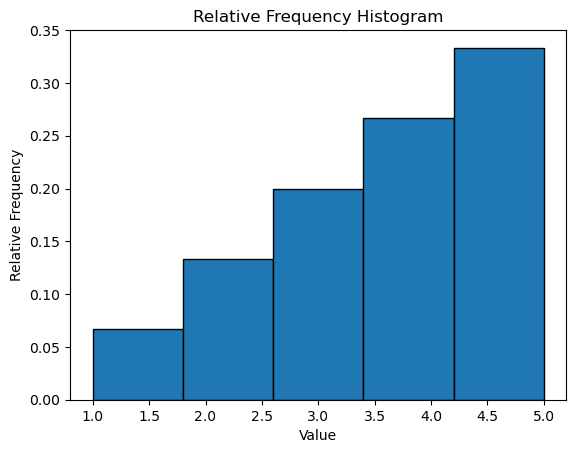

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_relative_frequency_histogram(data, bins):
    """
    Plots a relative frequency histogram for the input data using np.histogram.

    Parameters:
    data (list): A list of numerical values.
    bins (int): Number of bins for the histogram.
    """
    # Convert the data to a numpy array
    data = pd.Series(data)
    data.hist(bins=bins, weights=np.ones(len(data))/len(data), edgecolor='black', grid=False)

#     # Compute the histogram using np.histogram
#     frequencies, bin_edges = np.histogram(data, bins=bins, density=True)

#     # Plot the histogram
#     plt.bar(bin_edges[:-1], frequencies, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Relative Frequency')
    plt.title('Relative Frequency Histogram')

    # Show the plot
    plt.show()

# Example usage:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
num_bins = 5
plot_relative_frequency_histogram(data, bins=num_bins)

## Please download `lung_cancer_prediction_dataset.csv` from Moodle and Q4 to Q10 are based on this dataset

## Q4. Write Python program to implement the functions below (15 marks): 

1. Load the `lung_cancer_prediction_dataset.csv` into a dataframe (**2 marks**)
2. Check if any missing values in the dataframe (**5 marks**)
3. Count the number of zero values in `Survival_Years` and fill in zero values in the `Survival_Years` by `"Not applicable"` (**8 marks**)

In [26]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
df.isnull().values.any()

True

In [27]:
# Count the number of zero values in the 'Survival_Years' column
zero_values_count = (df['Survival_Years'] == 0).sum()

# Print the number of zero values
print(f"Number of zero values in 'Survival_Years': {zero_values_count}")

# Replace zero values in 'Survival_Years' with "Not applicable"
df['Survival_Years'] = df['Survival_Years'].replace(0, 'Not applicable')

# Print the dataframe to verify the changes
print(df.head)

Number of zero values in 'Survival_Years': 211671
<bound method NDFrame.head of             ID       Country  Population_Size  Age  Gender Smoker  \
0            0         China             1400   80    Male    Yes   
1            1          Iran               84   53    Male     No   
2            2        Mexico              128   47    Male    Yes   
3            3     Indonesia              273   39  Female     No   
4            4  South Africa               59   44  Female     No   
...        ...           ...              ...  ...     ...    ...   
220627  220627      Thailand               70   55    Male    Yes   
220628  220628  South Africa               59   66    Male     No   
220629  220629       Vietnam               97   46    Male     No   
220630  220630      Ethiopia              120   36    Male     No   
220631  220631       Germany               83   60  Female     No   

        Years_of_Smoking  Cigarettes_per_Day Passive_Smoker Family_History  \
0            

## Q5. Write Python program to implement the following tasks. (**10 marks**)
1. Count the number of each unique item in `Air_Pollution_Exposure` and `Occupational_Exposure` columns (**4 marks**)
2. Create a new dataframe that contains dummy variables for both the `Air_Pollution_Exposure` and `Occupational_Exposure` columns. (**6 marks**)

In [28]:
# Count the number of each unique item in 'Air_Pollution_Exposure'
air_pollution_counts = df['Air_Pollution_Exposure'].value_counts()
print("Unique counts in 'Air_Pollution_Exposure':")
print(air_pollution_counts)

# Count the number of each unique item in 'Occupational_Exposure'
occupational_exposure_counts = df['Occupational_Exposure'].value_counts()
print("\nUnique counts in 'Occupational_Exposure':")
print(occupational_exposure_counts)

# Create dummy variables for 'Air_Pollution_Exposure' and 'Occupational_Exposure'
df_with_dummies = pd.get_dummies(df, columns=['Air_Pollution_Exposure', 'Occupational_Exposure'])

# Print the resulting dataframe
print(df_with_dummies.head())

Unique counts in 'Air_Pollution_Exposure':
Air_Pollution_Exposure
Medium    110157
Low        55367
High       55108
Name: count, dtype: int64

Unique counts in 'Occupational_Exposure':
Occupational_Exposure
No     154115
Yes     66517
Name: count, dtype: int64
   ID       Country  Population_Size  Age  Gender Smoker  Years_of_Smoking  \
0   0         China             1400   80    Male    Yes                30   
1   1          Iran               84   53    Male     No                 0   
2   2        Mexico              128   47    Male    Yes                12   
3   3     Indonesia              273   39  Female     No                 0   
4   4  South Africa               59   44  Female     No                 0   

   Cigarettes_per_Day Passive_Smoker Family_History  ... Treatment_Type  \
0                  29             No             No  ...            NaN   
1                   0            Yes             No  ...            NaN   
2                   6            Yes        

## Q6. Write Python program to finish the following tasks. (10 marks)
1. Calculate the average age of smokers and non-smokers in the dataset. (**5 marks**)
2. Create a pivot table to show the average age of people with different gender and different lung cancer diagnosis status. (**5 marks**)

In [29]:
#Calculate the average age of smokers and non-smokers in the dataset
average_age_smokers = df[df['Smoker'] == 'Yes']['Age'].mean()
average_age_non_smokers = df[df['Smoker'] == 'No']['Age'].mean()

print("Average age of smokers:", average_age_smokers)
print("Average age of non-smokers:", average_age_non_smokers)

pivot_table = df.pivot_table(values='Age', index=['Lung_Cancer_Diagnosis','Gender'],aggfunc='mean')
print(pivot_table)

Average age of smokers: 52.57383321447573
Average age of non-smokers: 52.48130258294215
                                    Age
Lung_Cancer_Diagnosis Gender           
No                    Female  52.506939
                      Male    52.517479
Yes                   Female  53.160650
                      Male    52.327082


## Q7. Standardize the `Age` column (mean=0 and standard deviation=1) for Male individuals whose ages are between 30 and 50 years old, including both 30 and 50. (10 marks)

In [21]:
import pandas as pd
from sklearn import preprocessing

# input dataset
df = pd.read_csv('lung_cancer_prediction_dataset.csv')

# extract the males whose Age is between 30 to 50
filtered_df = df[(df['Age'] >= 30) & (df['Age'] <= 50) & (df['Gender'] == 'Male')].copy()

standard_scaler = preprocessing.StandardScaler()

# Standardization
filtered_df['Standardized_Age'] = standard_scaler.fit_transform(filtered_df[['Age']])

print(filtered_df[['Age', 'Standardized_Age']])


        Age  Standardized_Age
2        47          1.160334
8        32         -1.315965
10       45          0.830161
29       39         -0.160359
31       41          0.169814
...     ...               ...
220616   32         -1.315965
220619   47          1.160334
220623   36         -0.655619
220629   46          0.995247
220630   36         -0.655619

[34815 rows x 2 columns]


## Q8. Plot the frequency for `Air_Pollution_Exposure` in `Developing` regions. (5 marks)

<Axes: >

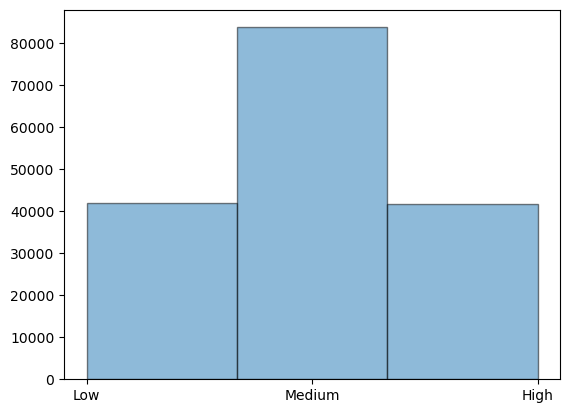

In [22]:
df[df['Developed_or_Developing'] == 'Developing']['Air_Pollution_Exposure'].hist(
    bins=3,
    alpha=0.5,
    edgecolor='black',
    grid=False,
    label='Developing'
)

## Q9. Apply min-max normalization to `Annual_Lung_Cancer_Deaths` and plot a boxplot for `Annual_Lung_Cancer_Deaths` by grouping the subjects based on their `Healthcare_Access`.  (**5 marks**)

<Axes: title={'center': 'Normalized_Annual_Lung_Cancer_Deaths'}, xlabel='[Healthcare_Access]'>

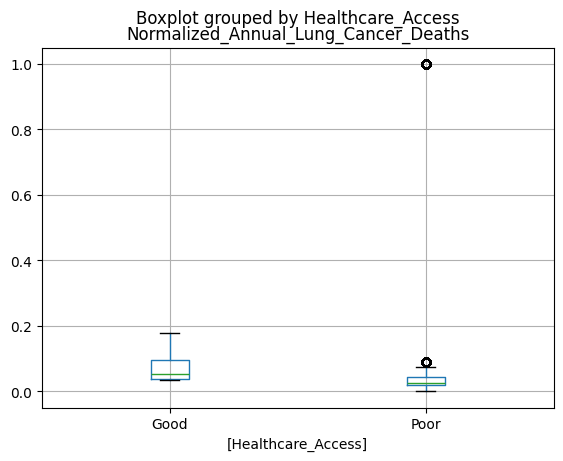

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Normalized_Annual_Lung_Cancer_Deaths'] = scaler.fit_transform(df[['Annual_Lung_Cancer_Deaths']])

df[['Normalized_Annual_Lung_Cancer_Deaths','Healthcare_Access']].boxplot(by='Healthcare_Access')

## Q10. Plot the total number of `Annual_Lung_Cancer_Deaths` for different `Country` and `Gender` combinations (**5 marks**)

<Axes: title={'center': 'Annual Lung Cancer Deaths by Country'}, xlabel='Country,Gender'>

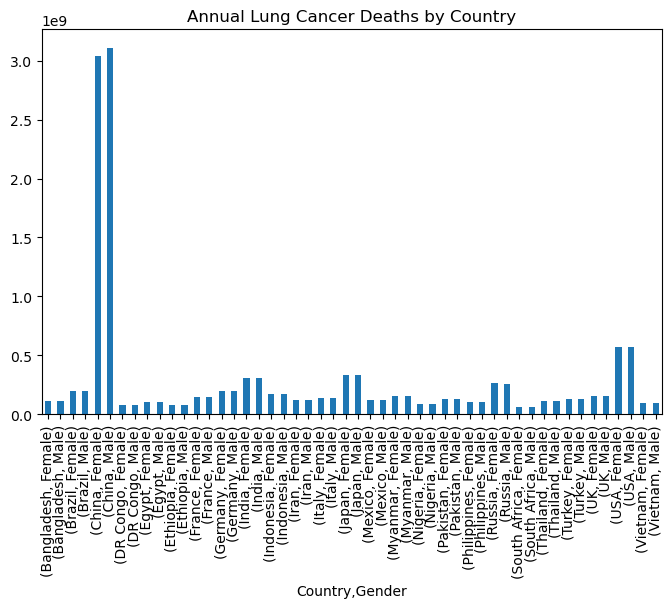

In [23]:
df.groupby(['Country','Gender'])['Annual_Lung_Cancer_Deaths'].sum().plot(kind='bar',
                             title='Annual Lung Cancer Deaths by Country',
                             figsize=(8, 5))